<a href="https://colab.research.google.com/github/Golden028/Machine_Learning/blob/main/JS11_TG08_2341720216_GOLDEN%20CHRISTIAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1**

**Step 1 - Import Libraries**

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Step 2 - Create Dummy Data**

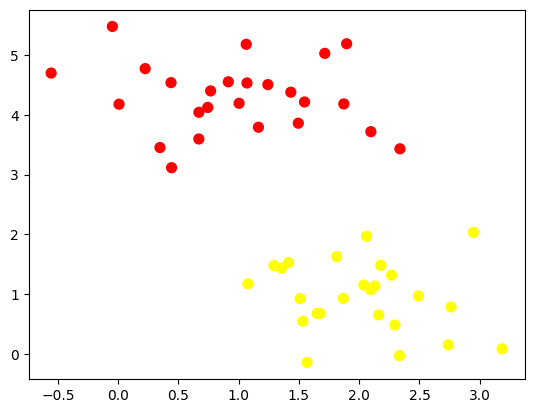

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Step 3 - Create Illustration of Decision Boundary**

**Step 4 - Margin Illustration**

(-1.0, 3.5)

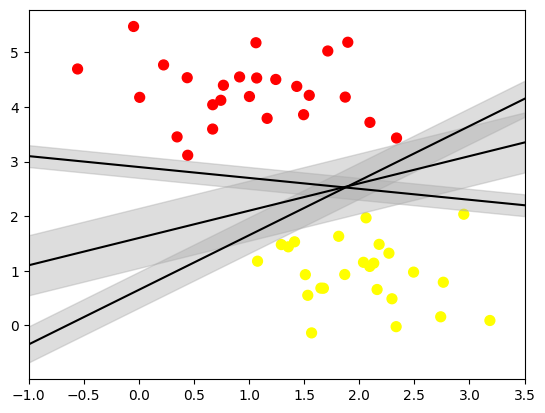

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

**Step 5 - Model Fitting**

In [4]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [5]:
# create a function to display the data fit

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create a grid for model evaluation
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

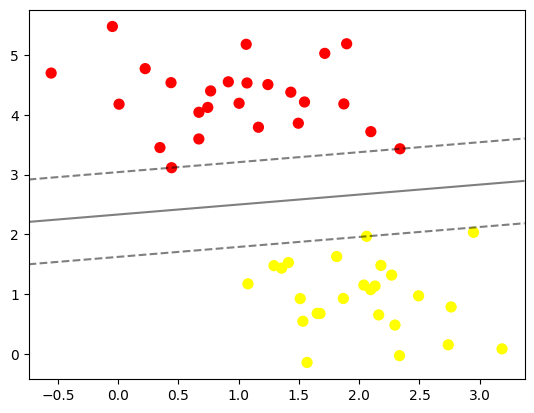

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

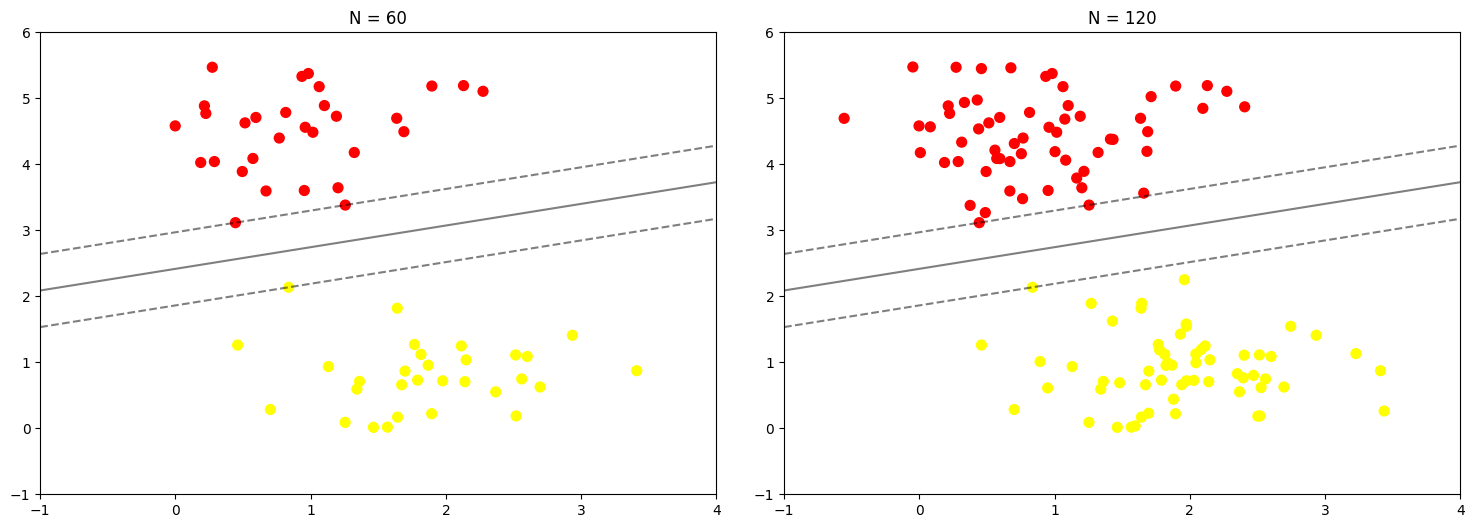

In [7]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [8]:
# the sample size may be chosen between 10 or 200 data points; no change to the model is observed

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

In [9]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.3 MB/s eta 0:00:00


# **Lab 2**

**Step 1 - Illustration of Non-Linear Data**

Step 1a - Import Libraries

In [10]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

Step 1b - Recreate the Plotting Function

In [11]:
# create a function to display model fitting

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create a grid for model evaluation
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Step 1c - Create Non-Linear Dummy Data

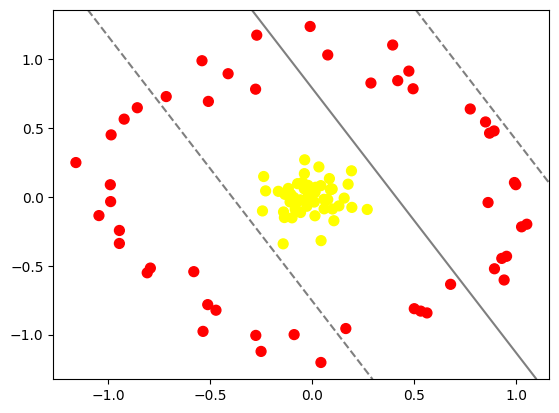

In [12]:
# example of non-linearly separable data
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [13]:
r = np.exp(-(X**2).sum(1))

In [14]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.10734469, -0.17369399],
       [-0.05645844, -0.02215839],
       [ 0.01117845, -0.03803561],
       [ 0.89249795,  0.47800021],
       [ 0.89444673, -0.52230594],
       [-0.53406991, -0.97678037],
       [ 0.13191479, -0.06596913],
       [ 0.95369772, -0.43189595],
       [-0.16484074,  0.03977291],
       [-0.10750506, -0.03724163],
       [-0.51100445, -0.78257705],
       [ 0.42025784,  0.84284001],
       [ 0.15773169, -0.00948846],
       [-0.02141862, -0.00425376],
       [ 0.17701921,  0.0914494 ],
       [-0.53915921,  0.98767947],
       [ 0.05856904, -0.01823031],
       [ 0.49550497,  0.78406349],
       [-0.00901466,  1.23622671],
       [-0.13941572, -0.10981316],
       [-0.13527261, -0.15054206],
       [ 0.86300914, -0.04145361],
       [ 0.28888509,  0.82569415],
       [-0.98686673, -0.03478844],
       [-0.08228179, -0.09031808],
       [-1.04415838, -0.13628492],
       [-0.05611377, -0.11398777],
       [ 0.04380932, -1.20250255],
       [-0.57927976, -0.54333511],
       [ 0.39550037,  1.10168154],
       [-0.03577923,  0.26851172],
       [-0.85623949,  0.64638869],
       [ 0.01452483, -0.13774846],
       [ 0.09890692,  0.05631309],
       [-0.23676745,  0.14730195],
       [ 0.16588951, -0.95618882],
       [-0.08748966, -1.00022041],
       [-0.10398806,  0.01873403],
       [-0.08851262, -0.00524466],
       [-0.98844193,  0.08762946],
       [ 0.93029385, -0.44704454],
       [ 0.09408538,  0.05760267],
       [ 0.53273047, -0.82965398],
       [-0.00268565,  0.04451418],
       [ 0.07728415,  1.02953504],
       [-0.14124056, -0.3414017 ],
       [ 0.50136613, -0.81211475],
       [-0.79216635, -0.51725908],
       [-0.01089491,  0.04282859],
       [-1.15718426,  0.24849656],
       [-0.24265901, -0.10252643],
       [-0.71448876,  0.72751335],
       [ 0.8704429 ,  0.46190645],
       [ 0.7757206 ,  0.63748528],
       [-0.27636578,  0.78107141],
       [-0.01959066,  0.0829345 ],
       [ 0.0129358 ,  0.03013903],
       [-0.11596346,  0.06076957],
       [-0.22720554,  0.04298541],
       [ 0.85063023,  0.54328742],
       [ 0.56360777, -0.84281323],
       [ 0.05940709, -0.08719593],
       [ 0.94176844, -0.60384794],
       [ 0.03386034,  0.21687798],
       [ 0.01504209,  0.03687373],
       [ 0.27074749, -0.09179584],
       [-0.04577186,  0.10438717],
       [-0.47061481, -0.82310122],
       [ 0.04338398,  0.08102833],
       [ 0.9989173 ,  0.08793033],
       [-0.13269354,  0.01794075],
       [ 0.19351955,  0.18858316],
       [-0.07850441, -0.05075048],
       [-0.09797864, -0.15252433],
       [ 0.67941295, -0.63528439],
       [ 0.47481274,  0.91231362],
       [-0.27543409, -1.00598856],
       [-0.07067676,  0.09531794],
       [ 0.04455175, -0.31819861],
       [-0.9439477 , -0.24429717],
       [-0.41112433,  0.8933849 ],
       [-0.98446435,  0.44946679],
       [ 1.0528947 , -0.19899594],
       [-0.94402726, -0.33869118],
       [-0.27069878,  1.17307161],
       [-0.24955532, -1.12224441],
       [ 0.09054073,  0.0511006 ],
       [-0.03731901,  0.16803776],
       [ 0.08535962,  0.13218974],
       [ 0.01801485,  0.06918825],
       [-0.92062021,  0.56370902],
       [ 0.99227374,  0.10360463],
       [ 0.19544058, -0.07677778],
       [-0.02529166, -0.06845024],
       [ 1.02725462, -0.21787057],
       [ 0.10026574, -0.08844755],
       [ 0.07724043, -0.01987945],
       [-0.50782383,  0.69241624],
       [-0.03793518,  0.05794122],
       [-0.80761131, -0.55151605]]), y=array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0]))>

**Step 2 - Model Fitting**

In [15]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

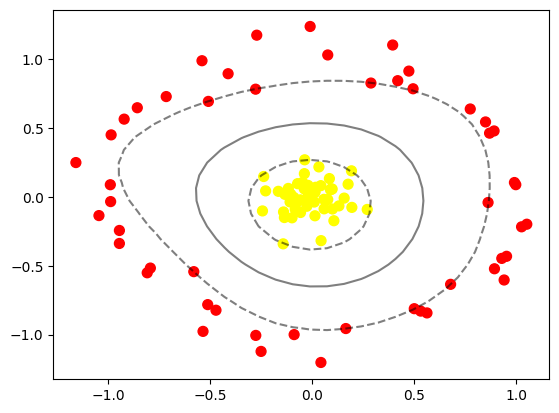

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# **Lab 3**

**Step 1 - Import Libraries and Create Plotting Function**

In [17]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [18]:
# create a function to display the data fitting

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create a grid for model evaluation
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Step 2 - Create Dummy Data**

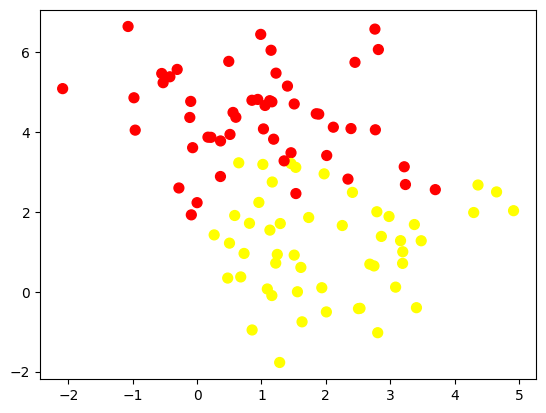

In [19]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Step 3 - Analyze the Impact of Tuning**

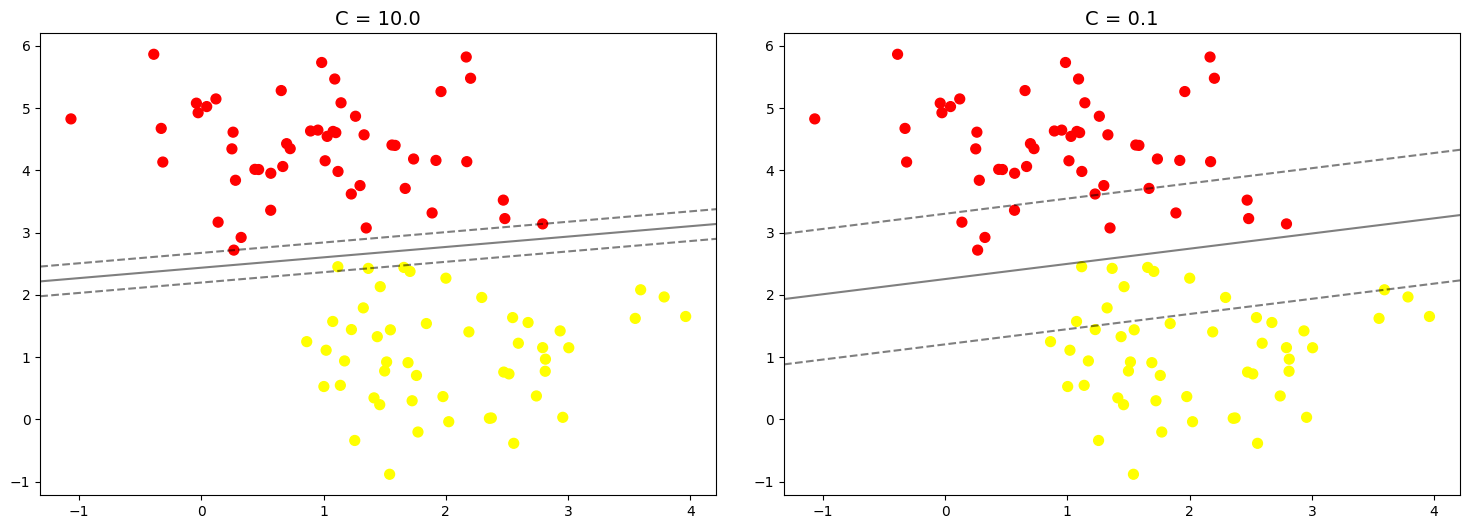

In [20]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

**Lab 4**

**Step 0 - Download the Dataset**

In [21]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


**Step 1 - Inspect Facial Images**

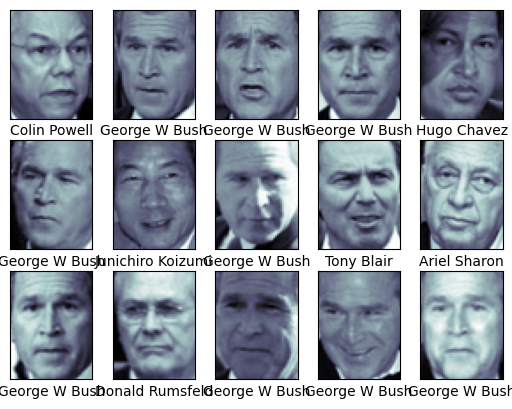

In [22]:
# example faces used
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

**Step 2 - Data Preprocessing**

In [23]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline is used to perform processes sequentially in
# a single function execution
model = make_pipeline(pca, svc)

**Step 3 - Split Data**

In [24]:
# separation of training and testing data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

**Step 4 - Model Creation + Tuning**

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 1s, sys: 167 ms, total: 2min 2s
Wall time: 1min 14s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [26]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

**Step 5 - Check Prediction Results**

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

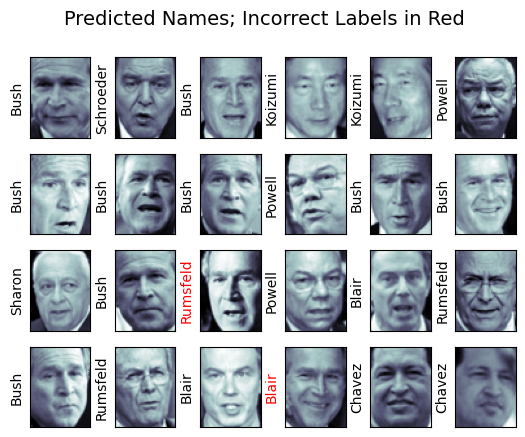

In [27]:
# labels of the testing data

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

**Step 6 - Check Performance**

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

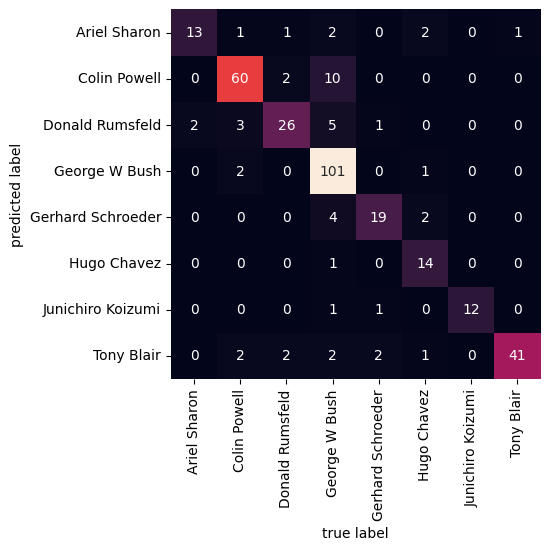

In [29]:
# construct confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# **Lab 5**

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 0 - Import Libraries**

In [31]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [32]:
# Image directories
train_dir = "/content/drive/MyDrive/ML/images/training/"
test_dir = "/content/drive/MyDrive/ML/images/test/"

**Step 1 - Load Data and Visualize**

In [33]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [34]:
# Load training data
train_img = load_dataset(train_dir)

In [35]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[123, 151, 190],
         [129, 157, 196],
         [123, 151, 190],
         ...,
         [217, 227, 237],
         [215, 225, 237],
         [209, 219, 231]],
 
        [[124, 152, 191],
         [130, 158, 197],
         [124, 152, 191],
         ...,
         [217, 227, 237],
         [216, 226, 238],
         [211, 221, 233]],
 
        [[126, 154, 193],
         [131, 159, 198],
         [124, 152, 191],
         ...,
         [216, 226, 236],
         [217, 227, 237],
         [215, 225, 235]],
 
        ...,
 
        [[ 81,  47,  48],
         [ 78,  44,  45],
         [ 87,  51,  53],
         ...,
         [ 36,  37,  41],
         [ 36,  37,  41],
         [ 36,  37,  41]],
 
        [[ 81,  47,  48],
         [ 77,  43,  44],
         [ 86,  50,  52],
         ...,
         [ 35,  36,  40],
         [ 36,  37,  41],
         [ 36,  37,  41]],
 
        [[ 76,  44,  45],
         [ 78,  46,  47],
         [ 82,  48,  49],
         ...,
         [ 35,  36,  40],
  

In [36]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[123, 151, 190],
         [129, 157, 196],
         [123, 151, 190],
         ...,
         [217, 227, 237],
         [215, 225, 237],
         [209, 219, 231]],
 
        [[124, 152, 191],
         [130, 158, 197],
         [124, 152, 191],
         ...,
         [217, 227, 237],
         [216, 226, 238],
         [211, 221, 233]],
 
        [[126, 154, 193],
         [131, 159, 198],
         [124, 152, 191],
         ...,
         [216, 226, 236],
         [217, 227, 237],
         [215, 225, 235]],
 
        ...,
 
        [[ 81,  47,  48],
         [ 78,  44,  45],
         [ 87,  51,  53],
         ...,
         [ 36,  37,  41],
         [ 36,  37,  41],
         [ 36,  37,  41]],
 
        [[ 81,  47,  48],
         [ 77,  43,  44],
         [ 86,  50,  52],
         ...,
         [ 35,  36,  40],
         [ 36,  37,  41],
         [ 36,  37,  41]],
 
        [[ 76,  44,  45],
         [ 78,  46,  47],
         [ 82,  48,  49],
         ...,
         [ 35,  36,  40],
  

In [37]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 29
(372, 640, 3)


In [38]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (737, 1024, 3)
Label	: night


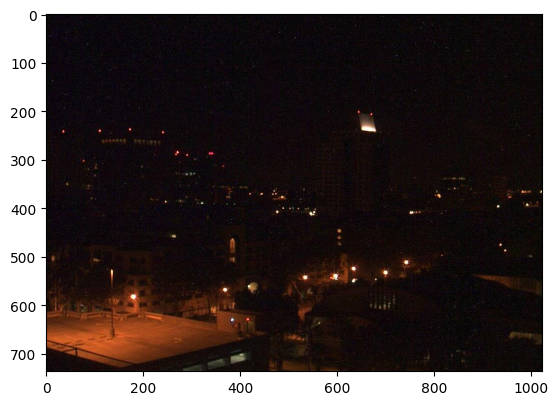

In [39]:
random_img_viz(train_img)

**Step 3 - Data Preprocessing**

In [40]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [41]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [42]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [43]:
train_std_img_list = preprocess(train_img)

In [44]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 22
(600, 1100, 3)


Shape	: (593, 800, 3)
Label	: night


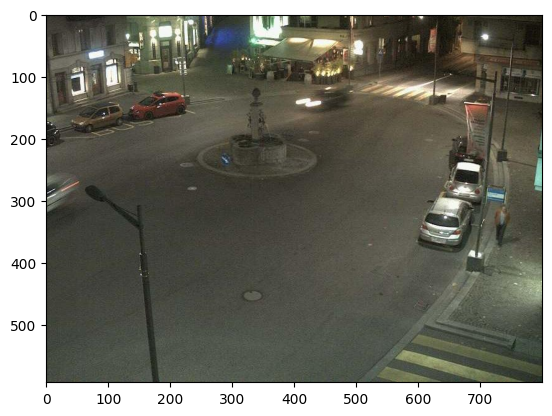

In [45]:
random_img_viz(train_img)

**Step 4 - Feature Extraction**

In [46]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 178
Avg Brighness: 13.7507


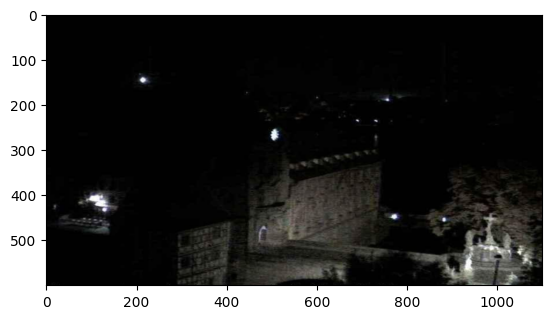

In [47]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

**Step 5 - Classification using Threshold Method**

In [48]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 146
Actual label: 0
Predicted label: 0


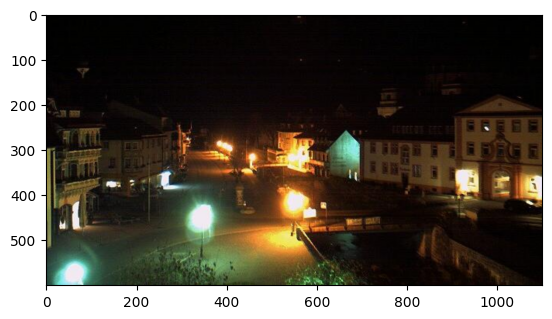

In [49]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

**Step 6 - Manual Evaluation**

In [50]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [51]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [52]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


**Classification with SVM**

**Alternative Step 4 - Constructing Feature Vectors.**

In [53]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [54]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,129.001000,1.0
1,200.020276,1.0
2,137.345858,1.0
3,191.533608,1.0
4,94.553459,1.0


In [55]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,153.885708,1.0
1,149.970523,1.0
2,201.607444,1.0
3,156.924998,1.0
4,134.486027,1.0


**Step 5 - Build SVM Model**

In [56]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

**Step 6 - Evaluation**

In [57]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# **Lab Assignment**

1. Construct an SVM model using the data voice.csv under the following conditions,

a. Split the data using ratios of 70:30 and 80:20 for each model to be developed.

i. Use a model with a linear kernel.

ii. Use a model with a polynomial kernel.

iii. Use a model with an RBF kernel.

b. Tabulate the performance of each split and kernel based on the accuracy metric.

2. Use the data from practical session 5 to develop a daytime and nighttime classification model using an SVM with an RBF kernel employing histogram features. Use an 80:20 ratio. You may experiment with hyperparameter tuning of the RBF kernel. Record the accuracy performance!

**TASK 1**

In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML/voice.csv')

# Display the first few rows
print("First few rows of the dataset:")
display(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
display(df.isnull().sum())

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

First few rows of the dataset:


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male



Missing values in the dataset:


,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
skew,0
kurt,0
sp.ent,0
sfm,0


In [59]:
from sklearn.model_selection import train_test_split

# Split the data with a 70:30 ratio
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Split the data with an 80:20 ratio
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Data split into 70:30 ratio:")
print(f"X_train_70 shape: {X_train_70.shape}")
print(f"X_test_70 shape: {X_test_70.shape}")
print(f"y_train_70 shape: {y_train_70.shape}")
print(f"y_test_70 shape: {y_test_70.shape}")

print("\nData split into 80:20 ratio:")
print(f"X_train_80 shape: {X_train_80.shape}")
print(f"X_test_80 shape: {X_test_80.shape}")
print(f"y_train_80 shape: {y_train_80.shape}")
print(f"y_test_80 shape: {y_test_80.shape}")

Data split into 70:30 ratio:
X_train_70 shape: (2217, 20)
X_test_70 shape: (951, 20)
y_train_70 shape: (2217,)
y_test_70 shape: (951,)

Data split into 80:20 ratio:
X_train_80 shape: (2534, 20)
X_test_80 shape: (634, 20)
y_train_80 shape: (2534,)
y_test_80 shape: (634,)


In [60]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instantiate and train the first model (70:30 split)
svm_linear_70 = SVC(kernel='linear')
svm_linear_70.fit(X_train_70, y_train_70)

# Make predictions and calculate accuracy for the 70:30 split
y_pred_linear_70 = svm_linear_70.predict(X_test_70)
accuracy_linear_70 = accuracy_score(y_test_70, y_pred_linear_70)

# Instantiate and train the second model (80:20 split)
svm_linear_80 = SVC(kernel='linear')
svm_linear_80.fit(X_train_80, y_train_80)

# Make predictions and calculate accuracy for the 80:20 split
y_pred_linear_80 = svm_linear_80.predict(X_test_80)
accuracy_linear_80 = accuracy_score(y_test_80, y_pred_linear_80)

# Print the accuracy scores
print(f"Accuracy for 70:30 split (Linear Kernel): {accuracy_linear_70}")
print(f"Accuracy for 80:20 split (Linear Kernel): {accuracy_linear_80}")

Accuracy for 70:30 split (Linear Kernel): 0.9263932702418507
Accuracy for 80:20 split (Linear Kernel): 0.9416403785488959


In [61]:
# Instantiate and train the first model (70:30 split) with polynomial kernel
svm_poly_70 = SVC(kernel='poly')
svm_poly_70.fit(X_train_70, y_train_70)

# Make predictions and calculate accuracy for the 70:30 split
y_pred_poly_70 = svm_poly_70.predict(X_test_70)
accuracy_poly_70 = accuracy_score(y_test_70, y_pred_poly_70)

# Instantiate and train the second model (80:20 split) with polynomial kernel
svm_poly_80 = SVC(kernel='poly')
svm_poly_80.fit(X_train_80, y_train_80)

# Make predictions and calculate accuracy for the 80:20 split
y_pred_poly_80 = svm_poly_80.predict(X_test_80)
accuracy_poly_80 = accuracy_score(y_test_80, y_pred_poly_80)

# Print the accuracy scores
print(f"Accuracy for 70:30 split (Polynomial Kernel): {accuracy_poly_70}")
print(f"Accuracy for 80:20 split (Polynomial Kernel): {accuracy_poly_80}")

Accuracy for 70:30 split (Polynomial Kernel): 0.4900105152471083
Accuracy for 80:20 split (Polynomial Kernel): 0.48264984227129337


In [62]:
# Instantiate and train the first model (70:30 split) with RBF kernel
svm_rbf_70 = SVC(kernel='rbf')
svm_rbf_70.fit(X_train_70, y_train_70)

# Make predictions and calculate accuracy for the 70:30 split
y_pred_rbf_70 = svm_rbf_70.predict(X_test_70)
accuracy_rbf_70 = accuracy_score(y_test_70, y_pred_rbf_70)

# Instantiate and train the second model (80:20 split) with RBF kernel
svm_rbf_80 = SVC(kernel='rbf')
svm_rbf_80.fit(X_train_80, y_train_80)

# Make predictions and calculate accuracy for the 80:20 split
y_pred_rbf_80 = svm_rbf_80.predict(X_test_80)
accuracy_rbf_80 = accuracy_score(y_test_80, y_pred_rbf_80)

# Print the accuracy scores
print(f"Accuracy for 70:30 split (RBF Kernel): {accuracy_rbf_70}")
print(f"Accuracy for 80:20 split (RBF Kernel): {accuracy_rbf_80}")

Accuracy for 70:30 split (RBF Kernel): 0.6624605678233438
Accuracy for 80:20 split (RBF Kernel): 0.6561514195583596


In [63]:
import pandas as pd

# Create a DataFrame to store the results
accuracy_table = pd.DataFrame({
    'Split Ratio': ['70:30', '70:30', '70:30', '80:20', '80:20', '80:20'],
    'Kernel': ['Linear', 'Polynomial', 'RBF', 'Linear', 'Polynomial', 'RBF'],
    'Accuracy': [accuracy_linear_70, accuracy_poly_70, accuracy_rbf_70, accuracy_linear_80, accuracy_poly_80, accuracy_rbf_80]
})

# Display the accuracy table
display(accuracy_table)

,Split Ratio,Kernel,Accuracy
0,70:30,Linear,0.926393
1,70:30,Polynomial,0.490011
2,70:30,RBF,0.662461
3,80:20,Linear,0.941640
4,80:20,Polynomial,0.482650
5,80:20,RBF,0.656151


**TASK 2**

  TASK 2: Klasifikasi Day/Night (Histogram + SVM RBF)
Menggunakan data dari direktori: /content/drive/MyDrive/ML/images

-> Memuat dan mengekstrak fitur histogram...

[INFO DATA] Data berhasil dimuat.
Total Sampel Training: 240
Total Sampel Test: 160
Dimensi Fitur per Sampel: 512 (512 fitur HSV)
--------------------------------------------------

[VISUALISASI] Contoh Gambar Training yang Digunakan:


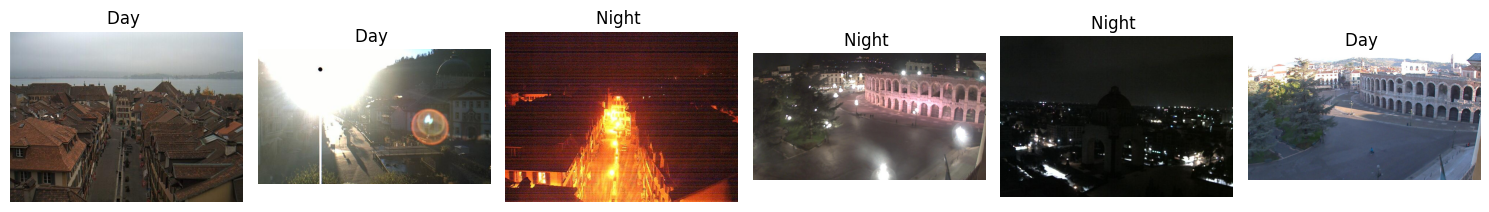


-> Melakukan Standard Scaling pada fitur...
Scaling selesai. Data siap untuk pemodelan.

-> Memulai Hyperparameter Tuning menggunakan GridSearchCV (Cross-Validation 3-fold)...
Tuning selesai.

HASIL HYPERPARAMETER TUNING (GRID SEARCH)
Best Parameters: C=1, gamma=scale
Best Cross-Validation Score (Training Set): 0.9875

-> Model terbaik dievaluasi pada data TEST...

[PERFORMA FINAL TASK 2]
Accuracy Performance (Data Test): **88.12%**


In [2]:
import numpy as np
import os
import cv2 # Untuk manipulasi gambar dan fitur histogram
import matplotlib.pyplot as plt # Untuk visualisasi
import random # Digunakan untuk sampling gambar
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# --- I. KONFIGURASI DAN PERSIAPAN DATA ---

# Path ke direktori utama data gambar.
PATH_IMAGES = '/content/drive/MyDrive/ML/images'


print("  TASK 2: Klasifikasi Day/Night (Histogram + SVM RBF)")

print(f"Menggunakan data dari direktori: {PATH_IMAGES}\n")

# 1. Fungsi Ekstraksi Fitur Histogram (Menggunakan HSV 3D: 512 Fitur)
def extract_histogram_features(image_path, bins=(8, 8, 8)):
    """Membaca gambar, menghitung 3D histogram HSV (512 fitur), dan menormalkannya."""
    img = cv2.imread(image_path)
    if img is None:
        return None

    try:
        # Konversi BGR ke HSV. HSV lebih baik untuk menangkap perbedaan warna/kecerahan.
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    except cv2.error:
        # Jika ada error konversi (misal, file rusak), kita lewati
        return None

    # Hitung 3D histogram: 8*8*8 = 512 fitur
    hist = cv2.calcHist(
        [img_hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256]
    )

    cv2.normalize(hist, hist) # Normalisasi agar nilainya dalam rentang yang sama
    return hist.flatten()

# 2. Fungsi Memuat Data dari Folder (Memisahkan Training dan Test)
def load_data_from_subfolders_with_paths(base_path):
    """Memuat fitur, label, dan path gambar dari subfolder day/night."""
    X = []
    y = []
    paths = []

    for label_name in ['day', 'night']:
        label_path = os.path.join(base_path, label_name)
        if not os.path.isdir(label_path):
            continue

        for filename in os.listdir(label_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(label_path, filename)
                features = extract_histogram_features(image_path)

                if features is not None:
                    X.append(features)
                    y.append(0 if label_name == 'day' else 1) # Labeling: 0 = Day, 1 = Night
                    paths.append(image_path)

    return np.array(X), np.array(y), paths

# Fungsi untuk menampilkan sampel gambar
def display_loaded_images(image_paths, labels, num_images=6):
    """Menampilkan beberapa sampel gambar yang berhasil dimuat."""

    indices = np.random.choice(len(image_paths), min(num_images, len(image_paths)), replace=False)

    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(indices):
        path = image_paths[idx]
        label = "Night " if labels[idx] == 1 else "Day "

        img = cv2.imread(path)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(1, num_images, i + 1)
            plt.imshow(img_rgb)
            plt.title(f"{label}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# 3. Muat Data Training dan Test
print("-> Memuat dan mengekstrak fitur histogram...")
X_train_h_raw, y_train_h, paths_train = load_data_from_subfolders_with_paths(os.path.join(PATH_IMAGES, 'training'))
X_test_h_raw, y_test_h, _ = load_data_from_subfolders_with_paths(os.path.join(PATH_IMAGES, 'test'))

if len(X_train_h_raw) == 0 or len(X_test_h_raw) == 0:
    print("\n[EROR FATAL] Tidak ada gambar yang berhasil dimuat. Cek path dan struktur folder.")
    exit()

print(f"\n[INFO DATA] Data berhasil dimuat.")
print(f"Total Sampel Training: {len(y_train_h)}")
print(f"Total Sampel Test: {len(y_test_h)}")
print(f"Dimensi Fitur per Sampel: {X_train_h_raw.shape[1]} (512 fitur HSV)")
print("-" * 50)

# Visualisasi Sampel
print("\n[VISUALISASI] Contoh Gambar Training yang Digunakan:")
display_loaded_images(paths_train, y_train_h, num_images=6)

# --- II. PRA-PEMROSESAN DAN PELATIHAN MODEL ---

# 4. Standard Scaling (WAJIB sebelum menggunakan SVM!)
print("\n-> Melakukan Standard Scaling pada fitur...")
scaler_hist = StandardScaler()
# Fit dan Transform HANYA pada data training
X_train_h = scaler_hist.fit_transform(X_train_h_raw)
# Transform data test menggunakan scaler yang SAMA
X_test_h = scaler_hist.transform(X_test_h_raw)
print("Scaling selesai. Data siap untuk pemodelan.")

# 5. Model SVM (RBF Kernel) dan Hyperparameter Tuning (GridSearchCV)
param_grid = {
    'C': [0.1, 1, 10, 100], # Parameter Penalti: Mengatur seberapa keras model dihukum karena kesalahan.
    'gamma': ['scale', 0.01, 0.1, 1] # Parameter Kernel: Mengatur radius pengaruh dari satu sampel training.
}
#

svm_rbf = SVC(kernel='rbf', random_state=42)

print("\n-> Memulai Hyperparameter Tuning menggunakan GridSearchCV (Cross-Validation 3-fold)...")
grid_search = GridSearchCV(svm_rbf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_h, y_train_h)
print("Tuning selesai.")

# 6. Evaluasi Model Terbaik
best_model = grid_search.best_estimator_

# Prediksi pada data uji (data yang belum pernah dilihat)
y_pred_h = best_model.predict(X_test_h)
accuracy_final = accuracy_score(y_test_h, y_pred_h)

# --- III. PELAPORAN HASIL ---

print("\n" + "="*50)
print("HASIL HYPERPARAMETER TUNING (GRID SEARCH)")
print("="*50)
print(f"Best Parameters: C={grid_search.best_params_['C']}, gamma={grid_search.best_params_['gamma']}")
print(f"Best Cross-Validation Score (Training Set): {grid_search.best_score_:.4f}")
print("\n-> Model terbaik dievaluasi pada data TEST...")

print("\n[PERFORMA FINAL TASK 2]")
print(f"Accuracy Performance (Data Test): **{accuracy_final*100:.2f}%**")
print("==================================================")